In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mpstyle')
np.set_printoptions(precision=2)

Bad value in file './deeplearning.mpstyle', line 21 ("axes.prop_cycle     : cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])"): Key axes.prop_cycle: "cycler(color=['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)
Bad value in file './deeplearning.mpstyle', line 25 ("legend.facecolor    : '#f0f0f0'"): Key legend.facecolor: "'" does not look like a color arg


In [2]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])


In [3]:
print(f"X Shape: {x_train.shape}, X Type:{type(x_train)}")
print(x_train)
print(f"Y shape: {y_train.shape}, y Type:{type(y_train)}")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Y shape: (3,), y Type:<class 'numpy.ndarray'>
[460 232 178]


In [24]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init}, b_init type: {type(b_init)}")

w_init shape: [  0.39  18.75 -53.36 -26.42], b_init type: <class 'float'>


In [ ]:
def predict_single_loop(x, w, b):
    """
    single predict using linear regressing
    
    Args:
        x (ndarray): Shape (n,) examle with multiple features
        w (ndarray): Shape (n,) model parameters
        c (scalar):  modle parameters
    
    Returns:
        p (scalar): prediction
    """
    ## fw,b = w[i] * x[i ] + b
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p +b
    return p

In [6]:
# get a row from our training data
x_vec = x_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [7]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
        x (ndarray):    Shape   (n,)    example with multiple features
        w (ndarray):    Shape   (n,)    model parameters
        b (scalar):                     model parameters
    
    Returns:
        p (scalar):     prediction
    """
    
    p = np.dot(x, w) + b
    return p

In [8]:
# get a row from our training data
x_vec = x_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [9]:
## Compute cost with multiple variables
## In contrast to previous labs, w and x are vectors rather than scalars supporting multiple featurs

## Cost function measures the difference between the models prediction and the actual values of `y`

def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
        x (ndarray (m,n)) :     Data, m examples with n features
        y (ndarray (m,))  :     target values
        w (ndarray (n,))  :     model parameters
        b (scalar)
    
    Returns:
        cost (scalar):          cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [23]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at optimal w: {cost}')
print(x_train.shape)

Cost at optimal w: 1.5578904428966628e-12
(3, 4)


In [42]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n): 
            dj_dw[j] = dj_dw[j] + err * X[i, j]
            
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw
    # print(dj_dw)

# compute_gradient(x_train, y_train, w_init, b_init)

In [38]:
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f"dj_db at initial w,b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: \n {tmp_dj_dw}")

Error is -2.380591695327894e-06
Error is -1.6305918961734278e-06
Error is -1.0105918590852525e-06
dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [39]:
## Gradient Descent with Multiple Variables

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
    """
    
    #An array to store cost J and w's at each iteration primarily graphing later
    J_history = []
    w = copy.deepcopy(w_in) #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b)    ##None
        
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw       ## None
        b = b - alpha * dj_db       ## None
        
        # Save cost J at each iteration
        if i < 100000:          # prevent resource exhaustion
            J_history.append(cost_function(X, y, w, b))
        
        # Print cost every at intervals 10 times or as many iterations
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}     ")
            
    return w, b, J_history # return final w,b  and J history for graphing

In [43]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f}, {w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"Prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46     
Iteration  100: Cost   695.99     
Iteration  200: Cost   694.92     
Iteration  300: Cost   693.86     
Iteration  400: Cost   692.81     
Iteration  500: Cost   691.77     
Iteration  600: Cost   690.73     
Iteration  700: Cost   689.71     
Iteration  800: Cost   688.70     
Iteration  900: Cost   687.69     
b,w found by gradient descent: -0.00, [ 0.2   0.   -0.01 -0.07] 
Prediction: 426.19, target value: 460
Prediction: 286.17, target value: 232
Prediction: 171.47, target value: 178


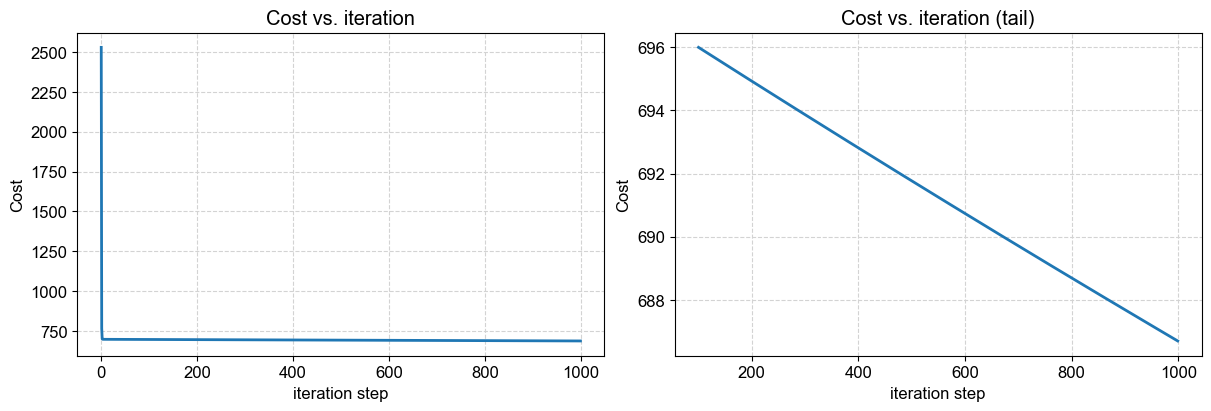

In [45]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()